**P Manohar Rao**

**Roll no:197158**

**DSC Assignment-5**

**Question 1**

In [14]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv('Salary_Data.csv', header=0)

In [17]:
X = df['YearsExperience'].values
#we have to change it in 2D as we can't use 1D array in scikit-learn 
X = X.reshape(-1,1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("YearsExperience : ",X)

Y = df['Salary'].values
print("Salary : ",Y)

YearsExperience :  [[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]
Salary :  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 29)
print("Independent Training Data : ", X_train)
print("\nIndependent Testing Data : ", X_test)
print("\nDependent Training Data : ", Y_train)
print("\nDependent Testing Data : ", Y_test)

Independent Training Data :  [[-0.50653674]
 [ 1.32129632]
 [-0.43485702]
 [-0.82909552]
 [ 1.50049564]
 [-0.1481381 ]
 [ 1.21377673]
 [-0.75741579]
 [-0.29149756]
 [-1.11581443]
 [-0.86493538]
 [-0.47069688]
 [ 0.92705781]
 [-1.43837321]
 [ 1.78721455]
 [ 1.85889428]
 [-0.00477865]
 [-0.57821647]
 [-1.51005294]
 [-0.75741579]
 [-1.36669348]
 [-0.47069688]
 [ 0.2461004 ]
 [ 0.6403389 ]]

Independent Testing Data :  [[-0.07645838]
 [ 0.53281931]
 [ 0.21026054]
 [ 1.03457741]
 [ 1.5363355 ]
 [-1.18749416]]

Dependent Training Data :  [ 63218. 105582.  57081.  60150. 116969.  67938. 109431.  54445.  61111.
  39891.  56642.  55794. 101302.  46205. 122391. 121872.  83088.  57189.
  39343.  64445.  37731.  56957.  93940.  98273.]

Dependent Testing Data :  [ 66029.  91738.  81363. 113812. 112635.  43525.]


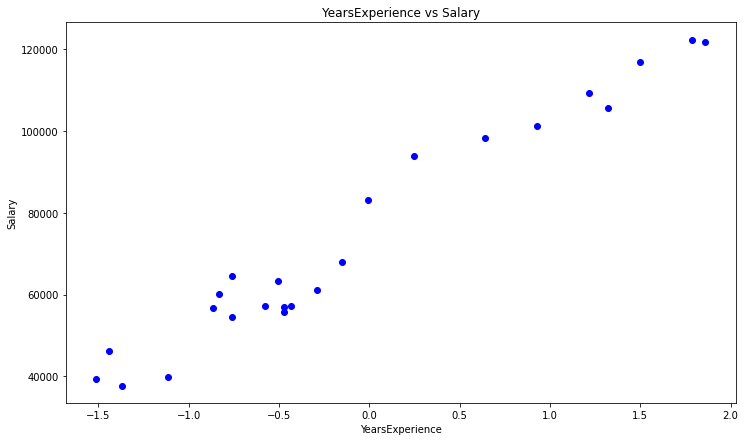

In [20]:
plt.figure(figsize = (12,7))

# Scatter Plot of Training Dataset
plt.scatter(X_train, Y_train, color='blue')
plt.title('YearsExperience vs Salary')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.show()

Predicted Values [ 74024.61348931  89898.99742928  81494.91181401 102972.01949749
 116045.04156571  45077.20748113]


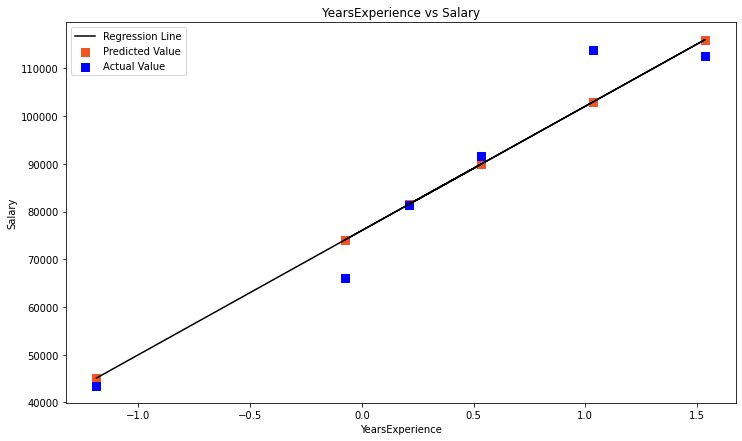

In [21]:
# Create Model
reg = LinearRegression()

# Fitting Training Data
reg = reg.fit(X_train, Y_train)

# predict Y
Y_pred = reg.predict(X_test)
print("Predicted Values",Y_pred)

plt.figure(figsize = (12,7))
plt.plot(X_test, Y_pred, color = 'black', label = "Regression Line")
plt.scatter(X_test, Y_pred, s = 50, color = '#ef5423',marker = 's', label = "Predicted Value")
plt.scatter(X_test, Y_test, s = 50, color = 'blue',marker = 's', label = "Actual Value")
plt.title('YearsExperience vs Salary')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.legend()
plt.show()

In [22]:
# Calculate the error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(Y_test,Y_pred)
print('r2 socre : ', score)
print('root_mean_squared error : ',np.sqrt(mean_squared_error(Y_test, Y_pred)))

r2 socre :  0.9467172742609804
root_mean_squared error :  5757.199479655678


In [23]:
# Question 2
# Implementation of the Simple Logistic Regression from Scratch
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
X, Y = df.drop('target', axis = 1), df['target']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features : ",X)

print("Dependent Feature : ",Y)

Independent Features :  [[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]
Dependent Feature :  0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [25]:
from random import randrange

def train_test_split(x, y, split):
  x_train, y_train = list(),list()
  train_size = split * len(x)
  x_test, y_test = list(x), list(y)
  while len(x_train) < train_size:
    idx = randrange(len(x_test))
    x_train.append(x_test.pop(idx))
    y_train.append(y_test.pop(idx))
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.8)

print("Independent Training Feature :-\n",X_train)
print("Dependent Training Feature :-\n",Y_train)
print("Dependent Testing Feature :-\n",Y_test)

Independent Training Feature :-
 [[-0.04040284  0.68100522  1.00257707 ...  0.97635214 -0.71442887
   1.12302895]
 [-0.04040284  0.68100522 -0.93851463 ... -0.64911323  1.24459328
  -0.51292188]
 [-1.03300228 -1.46841752 -0.93851463 ... -0.64911323 -0.71442887
  -0.51292188]
 ...
 [-0.04040284  0.68100522  1.00257707 ... -2.27457861  0.26508221
  -0.51292188]
 [ 0.5110413   0.68100522 -0.93851463 ... -0.64911323 -0.71442887
   1.12302895]
 [ 0.40075247  0.68100522 -0.93851463 ...  0.97635214 -0.71442887
   1.12302895]]
Dependent Training Feature :-
 [1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1
 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 

In [26]:
# Implement the logic of the algorithm using Gradient Descent Function

from math import exp

def sigmoid(z):
  return 1.0 / (1.0 + exp(-z))

def predict(row, coeff):
	y_pred = coeff[0]
	for i in range(len(row)):
		y_pred += coeff[i + 1] * row[i]
	return sigmoid(y_pred)
 
def Gradient_Descent(x_train, y_train, alpha, n_epoch):
	coef = [0.0 for i in range(len(x_train[0])+1)]
	for epoch in range(n_epoch):
		for i in range(len(x_train)):
			y_pred = predict(x_train[i], coef)
			error = y_train[i] - y_pred
			coef[0] = coef[0] + alpha * error * y_pred * (1.0 - y_pred)
			for j in range(len(x_train[i])):
				coef[j + 1] = coef[j + 1] + alpha * error * y_pred * (1.0 - y_pred) * x_train[i][j]
	return coef

alpha = 0.1
n_epoch = 100
coef = Gradient_Descent(X_train, Y_train, alpha, n_epoch)
print(np.around(coef,4))

[-0.1374  0.1431 -1.1637  1.3109 -0.6562 -0.2043  0.0094  0.3637  1.0505
 -0.5175 -1.1768  0.4467 -1.0398 -0.8272]


In [27]:
# Predict the values using test data
Y_pred = []
for i in range(len(X_test)):
  y = predict(X_test[i],coef)
  Y_pred.append(y)

# print predicted value
print("Predicted Value for testing data")
print(np.around(Y_pred,3))


# To calculate Loss
def LOG_LOSS(actual, predict):
  error = 0.0
  for i in range(len(actual)):
    pred_error_0 = actual[i] * np.log(predict[i])
    pred_error_1 = (1 - actual[i]) * np.log(1 - predict[i])
    error += pred_error_0 + pred_error_1
  mean_error = -error/float(len(actual))
  return mean_error

me = LOG_LOSS(Y_test, Y_pred)
print("\nMean Error :- ", me)

Predicted Value for testing data
[0.832 0.915 0.947 0.537 0.996 0.975 0.439 0.999 0.989 0.9   0.032 0.967
 0.949 0.999 0.832 0.992 0.868 0.7   0.996 0.867 0.732 0.723 0.889 0.97
 0.938 0.823 0.847 0.782 0.995 0.996 0.138 0.995 0.019 0.625 0.004 0.016
 0.177 0.    0.153 0.017 0.    0.017 0.001 0.888 0.    0.002 0.121 0.99
 0.003 0.013 0.219 0.453 0.184 0.162 0.572 0.877 0.004 0.946 0.004 0.815]

Mean Error :-  0.5061879023711435


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


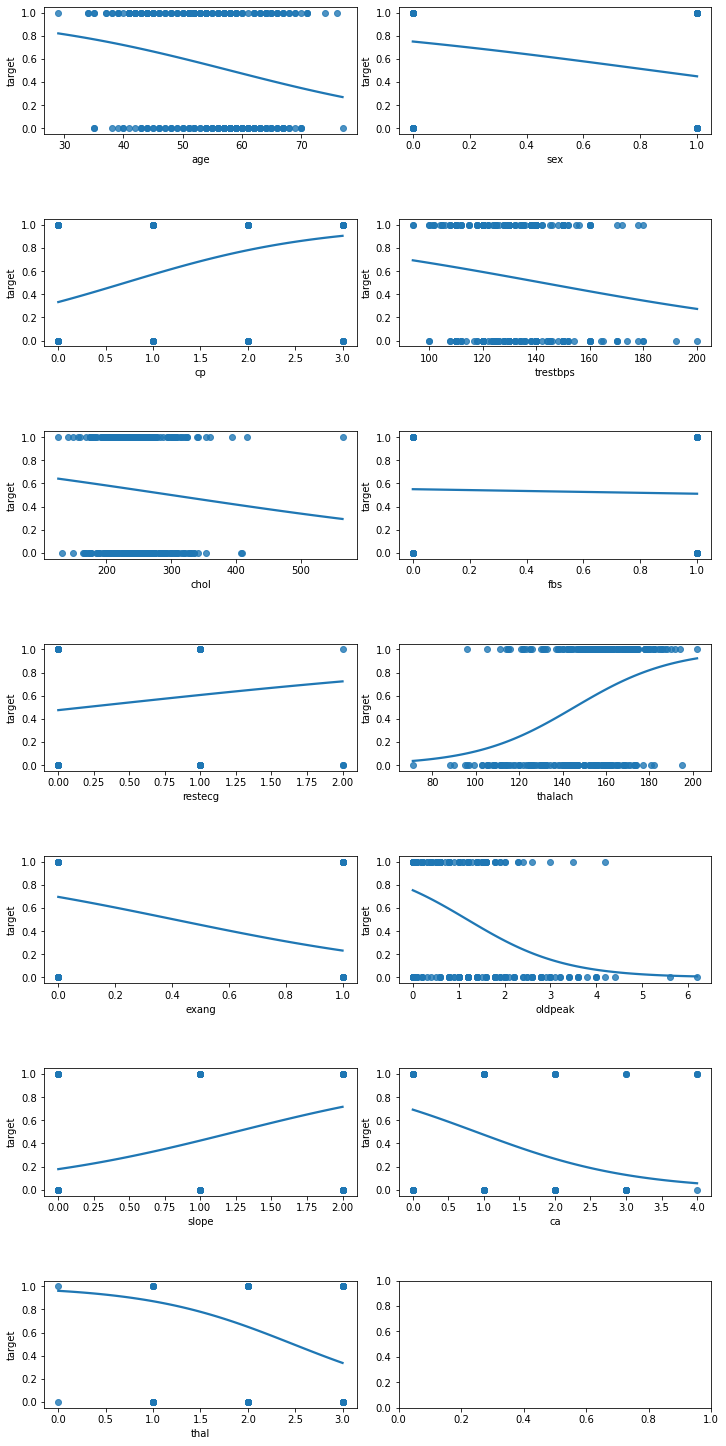

In [28]:
# Train the model and plot the data
import seaborn as sns
import matplotlib.pyplot as plt

col = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
fig, axs = plt.subplots(ncols = 2, nrows = 7, figsize=(10, 20))
axs = axs.flatten()
x = df.drop('target', axis = 1)
for i,k in enumerate(col):
  sns.regplot(x = x[k], y = Y,scatter= True, logistic = True, ci = None,ax = axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)